# 1) Interpolation

In [2]:
import numpy as np
import matplotlib.pyplot as plt

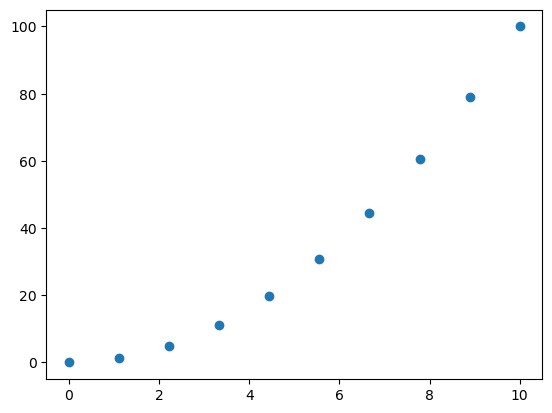

In [4]:
x = np.linspace(0, 10, 10)
y = x**2
plt.scatter(x, y)

In [ ]:
from scipy.interpolate import interp1d